# Analysing Uber Demand-Supply problem using Exploratory Data Analysis


#### We have uber masked data with us which is used by the company to resolve their business problem. We have data regarding rides to and from the airport as our main objective is to find problems pertaining to airport specific rides.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df= pd.read_csv(r'C:\Users\shubh\Downloads\datasets\data sets eda projects\Uber Request Data.csv')

### Cleaning the data

Cleaning the data is the most important  thing as it makes the rest of the analysis easier. We first look at the head of the data to get an idea about what kind data are we dealing with, we further look at the shape and info of the data. shape tells us the no. of rows and columns in our data while info tells us about the no. of non-null values in columns and their data types.

In [3]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [4]:
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB
None
(6745, 6)


 Now we check for the null values in our data, 1st we check how many null values are there in each column. then we see the counts of the value in the "Status" and "Pickup point" columns. 

 We observe that there are 2650 null values in our "Driver id" column and 3914 null values in our "Drop timestamp" column. 
 The null values in the "Driver id" column represents requests which were met with non-availability of cars, while the null values in the "Drop timestamp" column represnts those requests which were met with non-availability of cars plus those where the the drivers had cancelled the ride.
 
 No cars available (2650) + Cancelled (1264) = null values in Drop timestamp(3914)
 

In [5]:
df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [6]:
df['Status'].value_counts()

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

In [7]:
df['Pickup point'].value_counts()

City       3507
Airport    3238
Name: Pickup point, dtype: int64

Now we check if there are rows which have all the values as null because there is no use of such rows.
We find that there is no such row.

In [8]:
df.isnull().all(axis=1).sum()

0

As we see that our Columns "Request timestamp" & "Drop timestamp" have two different date formats in them so we need to convert them into datetime format for our further analysis.

As you can see that some of our dates have this '11/7/2016 11:51' format while some have '13-07-2016 08:33:16' format so we cannot use a simple 'pd.to_datetime' command as it reads days of some format as months while months as days, so we converted them into a common format using the code given below.

In [9]:
import datetime as datetime

In [10]:
df['Request Timestamp']=pd.to_datetime(df['Request timestamp'], format='%d/%m/%Y %H:%M', errors='coerce')
mask = df['Request Timestamp'].isnull()
df.loc[mask, 'Request Timestamp'] = pd.to_datetime(df[mask]['Request timestamp'], format='%d-%m-%Y %H:%M:%S',
                                             errors='coerce')

df['Drop Timestamp']=pd.to_datetime(df['Drop timestamp'], format='%d/%m/%Y %H:%M', errors='coerce')
mask = df['Drop Timestamp'].isnull()
df.loc[mask, 'Drop Timestamp'] = pd.to_datetime(df[mask]['Drop timestamp'], format='%d-%m-%Y %H:%M:%S',
                                             errors='coerce')

In [11]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Timestamp,Drop Timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47,2016-07-13 08:33:16,2016-07-13 09:25:47


### Deriving new metrics.

After converting into datetime format we can extract new metrics from the data which will help us in our further analysis.
We extracted the date, time, day and hour of the request and drop, this will help us to dive deep into the root cause of the problem statement.

In [12]:
df['Request Date']=df['Request Timestamp'].dt.date
df['Drop Date']=df['Drop Timestamp'].dt.date
df["Day of Request"]=df['Request Timestamp'].dt.day
df['Day of Drop']=df['Drop Timestamp'].dt.day
df['Request Time']=df['Request Timestamp'].dt.time
df['Drop Time']=df['Drop Timestamp'].dt.time
df['Request Hour']=df['Request Timestamp'].dt.hour
df['Drop Hour']=df['Drop Timestamp'].dt.hour

In [13]:
pd.set_option('display.max_columns', 16)
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Timestamp,Drop Timestamp,Request Date,Drop Date,Day of Request,Day of Drop,Request Time,Drop Time,Request Hour,Drop Hour
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,2016-07-11,11,11.0,11:51:00,13:00:00,11,13.0
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,2016-07-11,11,11.0,17:57:00,18:47:00,17,18.0
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,2016-07-12,12,12.0,09:17:00,09:58:00,9,9.0
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,2016-07-12,12,12.0,21:08:00,22:03:00,21,22.0
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,2016-07-13,13,13.0,08:33:16,09:25:47,8,9.0


#### From the "Requested Hour" column derived above, we divide the day into different parts for our better analysis & understanding by applying a function.

In [14]:
##      Early Morning(4,5,6) | Morning(7,8,9) | Late Morning(10,11) | Afternoon(12,13,14) 
##      Early Evening(15,16,17) | Late Evening(18,19,20) | Night(21,22,23) | Late Night(0,1,2,3)


In [15]:
def fun(x):
    if x in (4,5,6):
        return 'Early Morning'
    elif x in (7,8,9) :
        return 'Morning'
    elif x in (10,11):
        return 'Late Morning'
    elif x in (12,13,14):
        return 'Afternoon'
    elif x in (15,16,17):
        return'Early Evening'
    elif x in (18,19,20):
        return'Late Evening'
    elif x in (21,22,23):
        return 'Night'
    elif x in (0,1,2,3):
        return 'Late Night'
    else:
        return 'NA'

        

In [16]:
df['Part of Day Cab Requested']= df['Request Hour'].apply(fun)

In [17]:
pd.set_option('display.max_columns', 17)
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Timestamp,Drop Timestamp,Request Date,Drop Date,Day of Request,Day of Drop,Request Time,Drop Time,Request Hour,Drop Hour,Part of Day Cab Requested
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,2016-07-11,11,11.0,11:51:00,13:00:00,11,13.0,Late Morning
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,2016-07-11,11,11.0,17:57:00,18:47:00,17,18.0,Early Evening
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,2016-07-12,12,12.0,09:17:00,09:58:00,9,9.0,Morning
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,2016-07-12,12,12.0,21:08:00,22:03:00,21,22.0,Night
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,2016-07-13,13,13.0,08:33:16,09:25:47,8,9.0,Morning


#### Since our main objective is to analyse the demand and supply gap we create a new column 'Demand-Supply Gap'

We first created a "Demand" column which was assigned a value of 1 because a request for a ride was made everytime.
Then we created a "Supply" column which was assigned the value 0 and we assigned the value 1 when the status of the trip was completed. 
Then we subtracted the "Supply" column from the "Demand" column to get the demand supply gap and assigned the value as "Trip Completed" when the gap was 0 and "Trip Not Completed" when the demand-supply gap existed

In [18]:
df['Demand'] = 1

In [19]:
df['Supply'] = 0
df.loc[(df['Status'] == 'Trip Completed'),'Supply'] = 1

In [20]:
df['Demand-Supply Gap'] = df['Demand'] - df['Supply']
df.loc[df['Demand-Supply Gap']==0,'Demand-Supply Gap'] = 'Trip Completed'
df.loc[df['Demand-Supply Gap']==1,'Demand-Supply Gap'] = 'Trip Not Completed'

#### Now we drop the columns which are not required by us.

In [21]:
df= df.drop(['Demand', 'Supply','Request timestamp','Drop timestamp','Request Timestamp','Drop Timestamp'], axis=1)
df.head()

,Request id,Pickup point,Driver id,Status,Request Date,Drop Date,Day of Request,Day of Drop,Request Time,Drop Time,Request Hour,Drop Hour,Part of Day Cab Requested,Demand-Supply Gap
0,619,Airport,1.0,Trip Completed,2016-07-11,2016-07-11,11,11.0,11:51:00,13:00:00,11,13.0,Late Morning,Trip Completed
1,867,Airport,1.0,Trip Completed,2016-07-11,2016-07-11,11,11.0,17:57:00,18:47:00,17,18.0,Early Evening,Trip Completed
2,1807,City,1.0,Trip Completed,2016-07-12,2016-07-12,12,12.0,09:17:00,09:58:00,9,9.0,Morning,Trip Completed
3,2532,Airport,1.0,Trip Completed,2016-07-12,2016-07-12,12,12.0,21:08:00,22:03:00,21,22.0,Night,Trip Completed
4,3112,City,1.0,Trip Completed,2016-07-13,2016-07-13,13,13.0,08:33:16,09:25:47,8,9.0,Morning,Trip Completed


Now we are done with the data cleaning and deriving metrics for our analysis

### Now we perform univariate and segmented analysis on our data to draw insights from them

##### Since we are only dealing with categorical variable we have used countplots.

##### At first we checked the number of requests made from two different pickup point. Request made from city to airport was 3507 while that from airport to city was 3238


In [22]:
df['Pickup point'].value_counts()

City       3507
Airport    3238
Name: Pickup point, dtype: int64

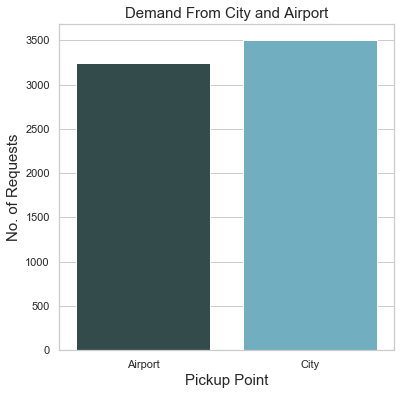

In [23]:
sns.set(style="whitegrid")
plt.figure(figsize=(6,6))
color=["darkslategrey","c"]
sns.countplot(x='Pickup point', data=df, palette=color)
plt.title('Demand From City and Airport', fontsize= 15)
plt.xlabel('Pickup Point', fontsize= 15)
plt.ylabel('No. of Requests', fontsize= 15)
plt.show()

##### We checked the count of the status of the trip, we see that their are 2831 trips which were completed while 2650 times the car was not available and 1264 requests were cancelled.

In [24]:
df['Status'].value_counts()

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

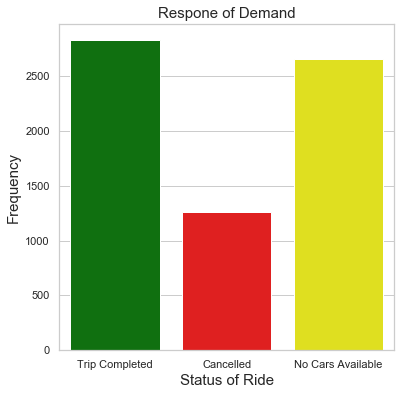

In [25]:
sns.set(style="whitegrid")
plt.figure(figsize=(6,6))
color=["green", "red","yellow"]
sns.countplot(x='Status', data=df, palette=color)
plt.title('Respone of Demand', fontsize= 15)
plt.xlabel('Status of Ride', fontsize= 15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

##### We see for the status of the ride by the pickup point.

We see that the problem of no cars being available is acute when the pickup point is airport, while the problem of cancellation exists mostly when the ride is from the city to the airport.

In [26]:
twowaytable= pd.crosstab(df['Pickup point'],df['Status'])
twowaytable

Status,Cancelled,No Cars Available,Trip Completed
Pickup point,,,
Airport,198,1713,1327
City,1066,937,1504


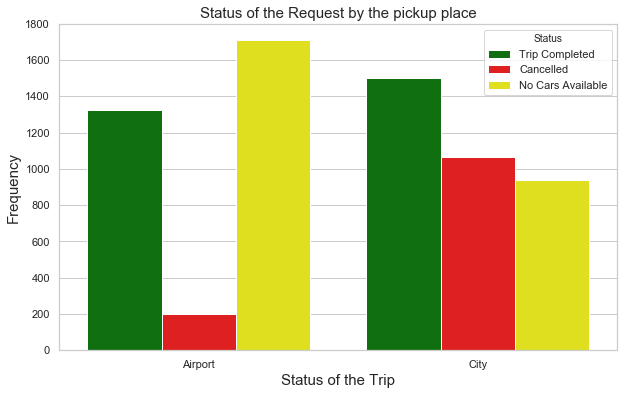

In [27]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
color=["green", "red","yellow"]
sns.countplot(x='Pickup point',hue= 'Status', data=df, palette=color)
plt.title('Status of the Request by the pickup place', fontsize= 15)
plt.xlabel('Status of the Trip', fontsize= 15)
plt.ylabel('Frequency', fontsize= 15)
plt.show()

##### We see for frequency of the demand made in different hours, we see that maximum demand is in the morning between 5-9 Hrs and then in the evening and night between 17-21 Hrs.

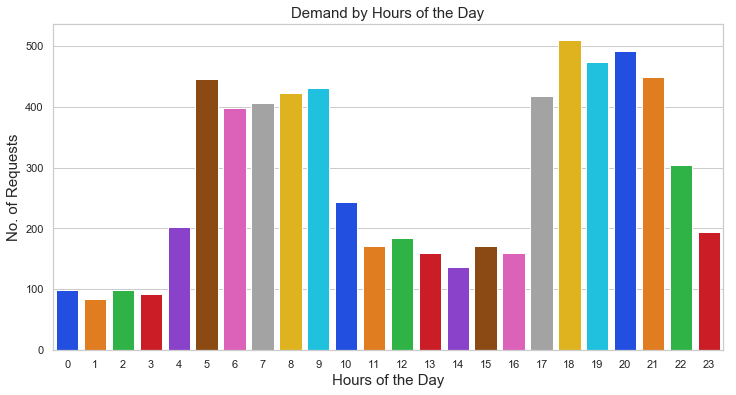

In [28]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,6))
sns.countplot(x='Request Hour', data=df, palette='bright')
plt.title('Demand by Hours of the Day', fontsize= 15)
plt.xlabel('Hours of the Day', fontsize= 15)
plt.ylabel('No. of Requests', fontsize= 15)
plt.show()

##### We see for frequency of the demand made in different hours by the pickup point. 

We observe that the demand from city to airport exceeds the demand from airport to city between 4 Hrs in the morning till 16 Hrs in the evening.
While between 5 Hrs to 10 Hrs in the morning the demand from city to airport exceeds the demand from airport to city by almost 4 times.
The demand from airport to city is more than triple than the demand from city to airport between 17Hrs to 21Hrs. 

Thus we conclude that the high demand in the morning is for trips from city to airport while the high demand in the evening and night is for the trips from airport to the city.

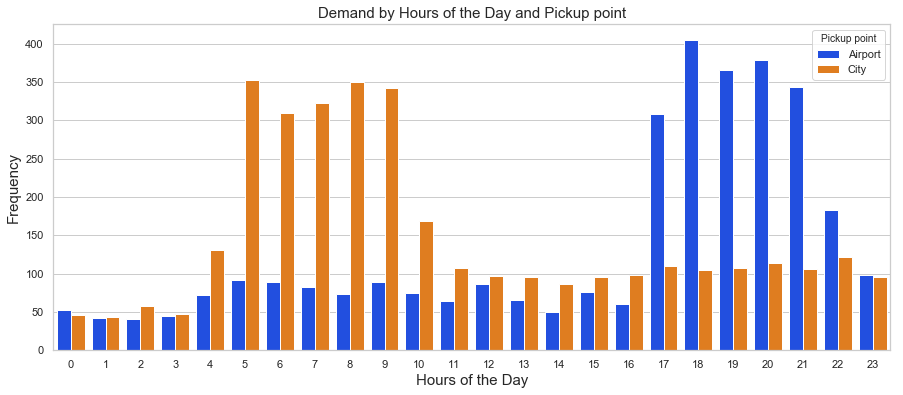

In [29]:
sns.set(style="whitegrid")
plt.figure(figsize=(15,6))
sns.countplot(x='Request Hour',hue='Pickup point', data=df, palette='bright')
plt.title('Demand by Hours of the Day and Pickup point', fontsize= 15)
plt.xlabel('Hours of the Day', fontsize= 15)
plt.ylabel('Frequency', fontsize= 15)
plt.show()

##### Now we see for Status of the Request in different Hours 

We obsereve that most of the requests are being cancelled during the morning hours between 5Hrs to 9Hrs, while the problem of no cars being available is between 17Hrs to 22Hrs, we saw that the major demand during morning comes for rides from city to airport and during evening and night demand is high for rides from airport to city. So we see that the problem of rides cancellation persists for rides to airport while the problem of no cars being available is for rides from airport.

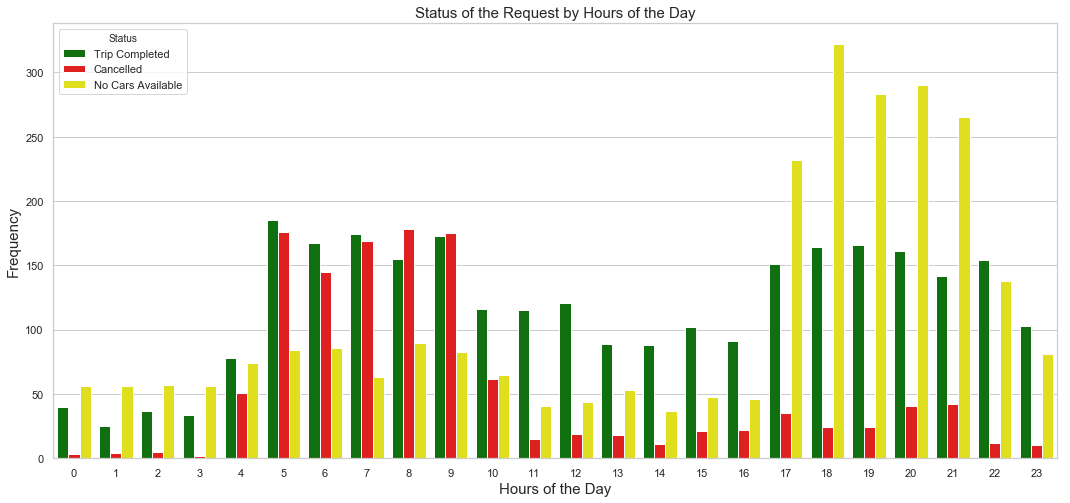

In [30]:
sns.set(style="whitegrid")
plt.figure(figsize=(18,8))
color=["green", "red","yellow"]
sns.countplot(x='Request Hour',hue='Status', data=df, palette=color)
plt.title('Status of the Request by Hours of the Day', fontsize= 15)
plt.xlabel('Hours of the Day', fontsize= 15)
plt.ylabel('Frequency', fontsize= 15)
plt.show()

##### Now we see for the no. of demand by the part of the day when cab is requested 

We see the maximum demand comes in the late evening, morning and the early morning time period, while the demand is minimum during late night,late morning and afternoon. 

In [31]:
df['Part of Day Cab Requested'].value_counts()

Late Evening     1475
Morning          1260
Early Morning    1046
Night             947
Early Evening     748
Afternoon         480
Late Morning      414
Late Night        375
Name: Part of Day Cab Requested, dtype: int64

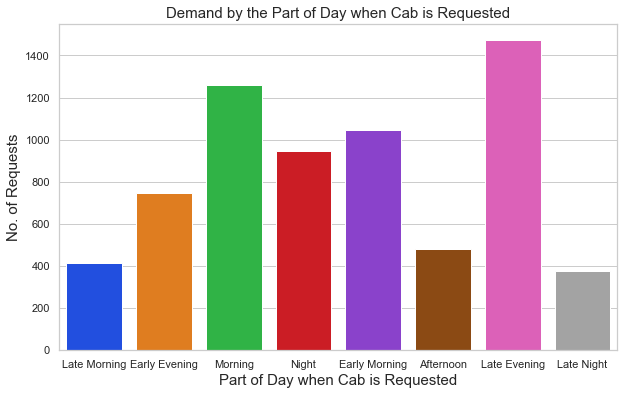

In [32]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.countplot(x='Part of Day Cab Requested', data=df, palette='bright')
plt.title('Demand by the Part of Day when Cab is Requested', fontsize= 15)
plt.xlabel('Part of Day when Cab is Requested', fontsize= 15)
plt.ylabel('No. of Requests', fontsize= 15)
plt.show()

##### We see for the Demand by the Pickup Point in Different Parts of Day

As we have seen earlier that in the morning the request comes for rides from the airport to the city while in the late evening demand comes for rides from airport to city

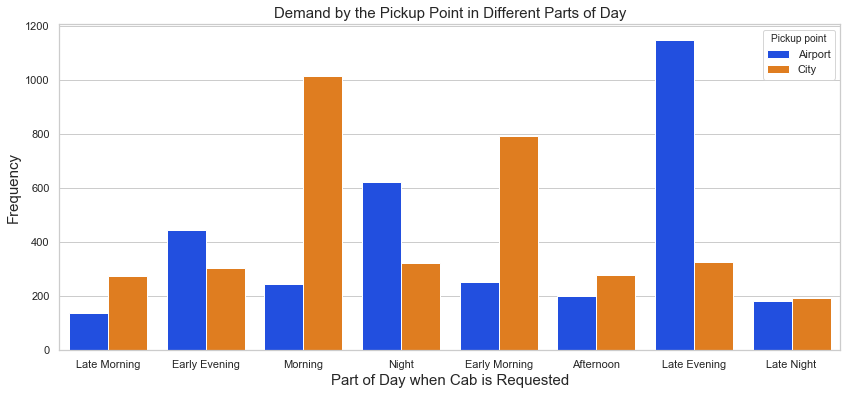

In [33]:
sns.set(style="whitegrid")
plt.figure(figsize=(14,6))
sns.countplot(x='Part of Day Cab Requested', hue="Pickup point",data=df, palette='bright')
plt.title('Demand by the Pickup Point in Different Parts of Day', fontsize= 15)
plt.xlabel('Part of Day when Cab is Requested', fontsize= 15)
plt.ylabel('Frequency', fontsize= 15)
plt.show()

##### We see for the Status of the Request by the Parts of Day

We observe that the main problem of cars being not available is in late evening when demand is high for rides from airport to city and the problem of cancellation is seen in early morning and morning.

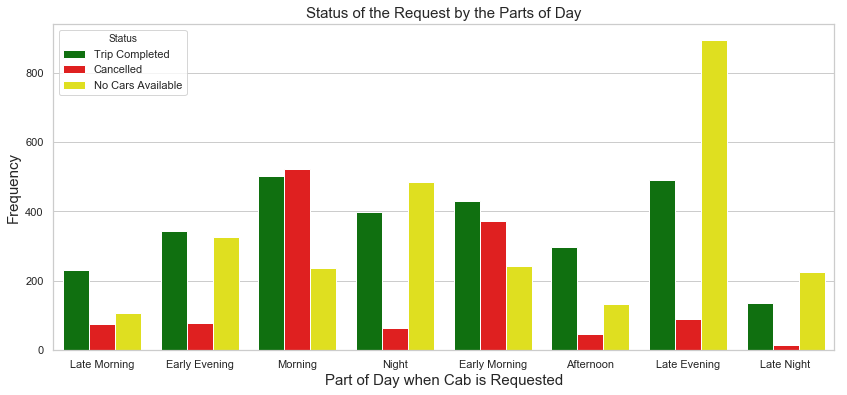

In [34]:
sns.set(style="whitegrid")
plt.figure(figsize=(14,6))
sns.countplot(x='Part of Day Cab Requested', hue="Status",data=df, palette=color)
plt.title('Status of the Request by the Parts of Day', fontsize= 15)
plt.xlabel('Part of Day when Cab is Requested', fontsize= 15)
plt.ylabel('Frequency', fontsize= 15)
plt.show()

### Now we shift our focus on the demand supply gap.

##### We see the demand and supply by the different parts of the day.

In [35]:
### No. of Trips Completed & Trips Not Completed

In [36]:
df['Demand-Supply Gap'].value_counts()

Trip Not Completed    3914
Trip Completed        2831
Name: Demand-Supply Gap, dtype: int64

In [37]:
### No. of trips completed and not completed by the part of the day

In [38]:
twowaytable= pd.crosstab(df['Demand-Supply Gap'],df['Part of Day Cab Requested'])
twowaytable

Part of Day Cab Requested,Afternoon,Early Evening,Early Morning,Late Evening,Late Morning,Late Night,Morning,Night
Demand-Supply Gap,,,,,,,,
Trip Completed,298,344,430,491,231,136,502,399
Trip Not Completed,182,404,616,984,183,239,758,548


We see that the demand-supply gap is maximum in late evening and morning because of non availability of cars and cancellation respectively.

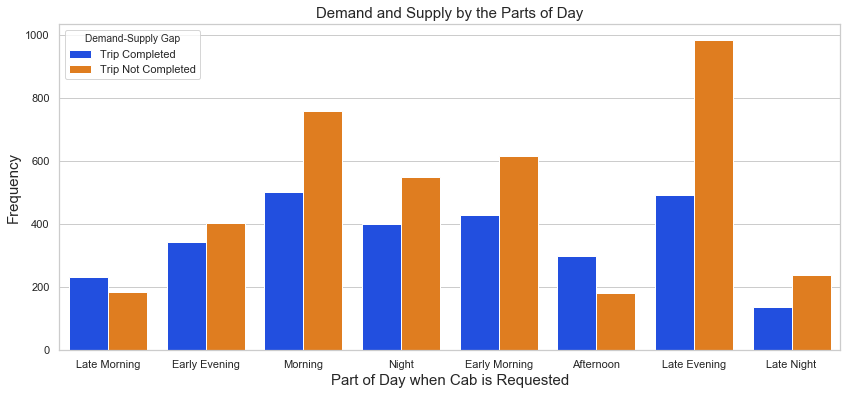

In [39]:
sns.set(style="whitegrid")
plt.figure(figsize=(14,6))
sns.countplot(x='Part of Day Cab Requested', hue="Demand-Supply Gap",data=df, palette='bright')
plt.title('Demand and Supply by the Parts of Day', fontsize= 15)
plt.xlabel('Part of Day when Cab is Requested', fontsize= 15)
plt.ylabel('Frequency', fontsize= 15)
plt.show()

##### We see for the demand supply gap for the pickup point

In [40]:
#### No. of trips completed and not completed by the Pickup point

In [41]:
twowaytable= pd.crosstab(df['Demand-Supply Gap'],df['Pickup point'])
twowaytable

Pickup point,Airport,City
Demand-Supply Gap,,
Trip Completed,1327,1504
Trip Not Completed,1911,2003


We see that the proportion of trip completed to that of trip not completed is low for both the pickup points and uber is losing out on the money.

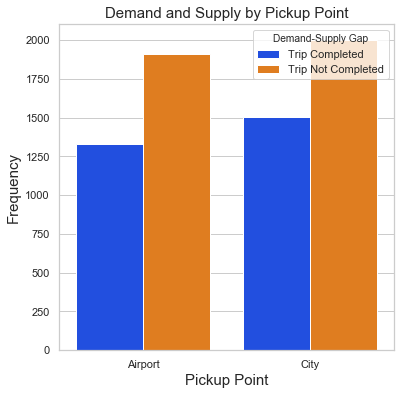

In [42]:
sns.set(style="whitegrid")
plt.figure(figsize=(6,6))
sns.countplot(x='Pickup point', hue="Demand-Supply Gap",data=df, palette='bright')
plt.title('Demand and Supply by Pickup Point', fontsize= 15)
plt.xlabel('Pickup Point', fontsize= 15)
plt.ylabel('Frequency', fontsize= 15)
plt.show()

##### We see for the demand supply gap for the pickup point and different times of the day.

In [43]:
#### No. of trips completed and not completed by the Pickup point and Part of Day.

In [44]:
by_time_pickup = df.groupby(['Part of Day Cab Requested', 'Pickup point'])
by_time_pickup['Demand-Supply Gap'].value_counts()

Part of Day Cab Requested  Pickup point  Demand-Supply Gap 
Afternoon                  Airport       Trip Completed        135
                                         Trip Not Completed     67
                           City          Trip Completed        163
                                         Trip Not Completed    115
Early Evening              Airport       Trip Not Completed    281
                                         Trip Completed        164
                           City          Trip Completed        180
                                         Trip Not Completed    123
Early Morning              Airport       Trip Completed        202
                                         Trip Not Completed     51
                           City          Trip Not Completed    565
                                         Trip Completed        228
Late Evening               Airport       Trip Not Completed    911
                                         Trip Completed        238
  

We see that the main gap between demand and supply exist in Early morning and morning for rides from city to airport and in late evening and night for rides from  airport to city

##### To see if the status of the ride varies during different days or it shows a similar pattern every day.

We see that the status of the rides follow a similar pattern everyday.

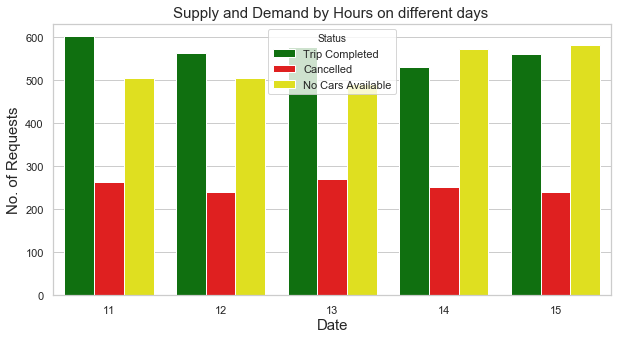

In [45]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
sns.countplot(x='Day of Request', hue="Status",data=df, palette=color)
plt.title('Supply and Demand by Hours on different days ', fontsize= 15)
plt.xlabel('Date', fontsize= 15)
plt.ylabel('No. of Requests', fontsize= 15)
plt.show()

## Hypothesis :

### Pickup Point - City :

#### As per our analysis, the early morning and morning time is most problematic when the requests for rides are being cancelled. The reason may be the rush during the morning because of the office timings. The distance to the airport is also far so the driver can earn more in short trips. Another possible reason for drivers cancelling the rides is because they dont get customers easily from the airport for a trip in the morning due to the arrival of lesser no. of flights in the morning.



### Pickup Point - Airport :

#### Upon analysis, the late evening and night time slot seems to be most problematic for pickup from airport where the requests are met by non-availability of cars. The reason seems to be that not enough cars are available to serve the requests as cars might not be available at the airport due to the cars serving inside the city. Most of the drivers end their day's work by the night time and very few drivers are willing to do a night shift so the supply of uber cars are less as compared to the morning time.

### Conclusions :

#### Based on our analysis , following recommendation can be used by Uber to bridge the gap between supply and demand: -

##### 1. For bridging the demand supply gap from airport to city, making a permanent stand in the airport itself where the cabs will be available at all times and the incomplete requests can come down significantly. 

##### 2. Uber can provide some incentives likes a greater share of the total bill amount to the driver who complete the trip from city to airport in the morning. This might result in the driver not canceling the request for trips from city to airport.

##### 3. Uber can provide incentives to those driver who are willing to serve at night, particularly those serving in and around the airport area.

##### 4. The sure solution to bring down the gap is to increase the numbers of cabs used by uber.